## Generating Example Classification Data

In [2]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [30]:
h=1
sd=1
n=50

def gen_data(n,h,sd1,sd2):
    x1=ss.norm.rvs(-h,sd1,n)
    y1=ss.norm.rvs(0,sd1,n)
    x2=ss.norm.rvs(h,sd2,n)
    y2=ss.norm.rvs(0,sd2,n)
    return (x1,y1,x2,y2)

In [31]:
(x1,y1,x2,y2)=gen_data(50,1,1,1.5)

In [32]:
(x1,y1,x2,y2)=gen_data(1000,1.5,1,1.5)

In [33]:
def plot_data(x1,y1,x2,y2):
    plt.figure()
    plt.plot(x1,y1,"o",ms=2)
    plt.plot(x2,y2,"o",ms=2)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")


<IPython.core.display.Javascript object>


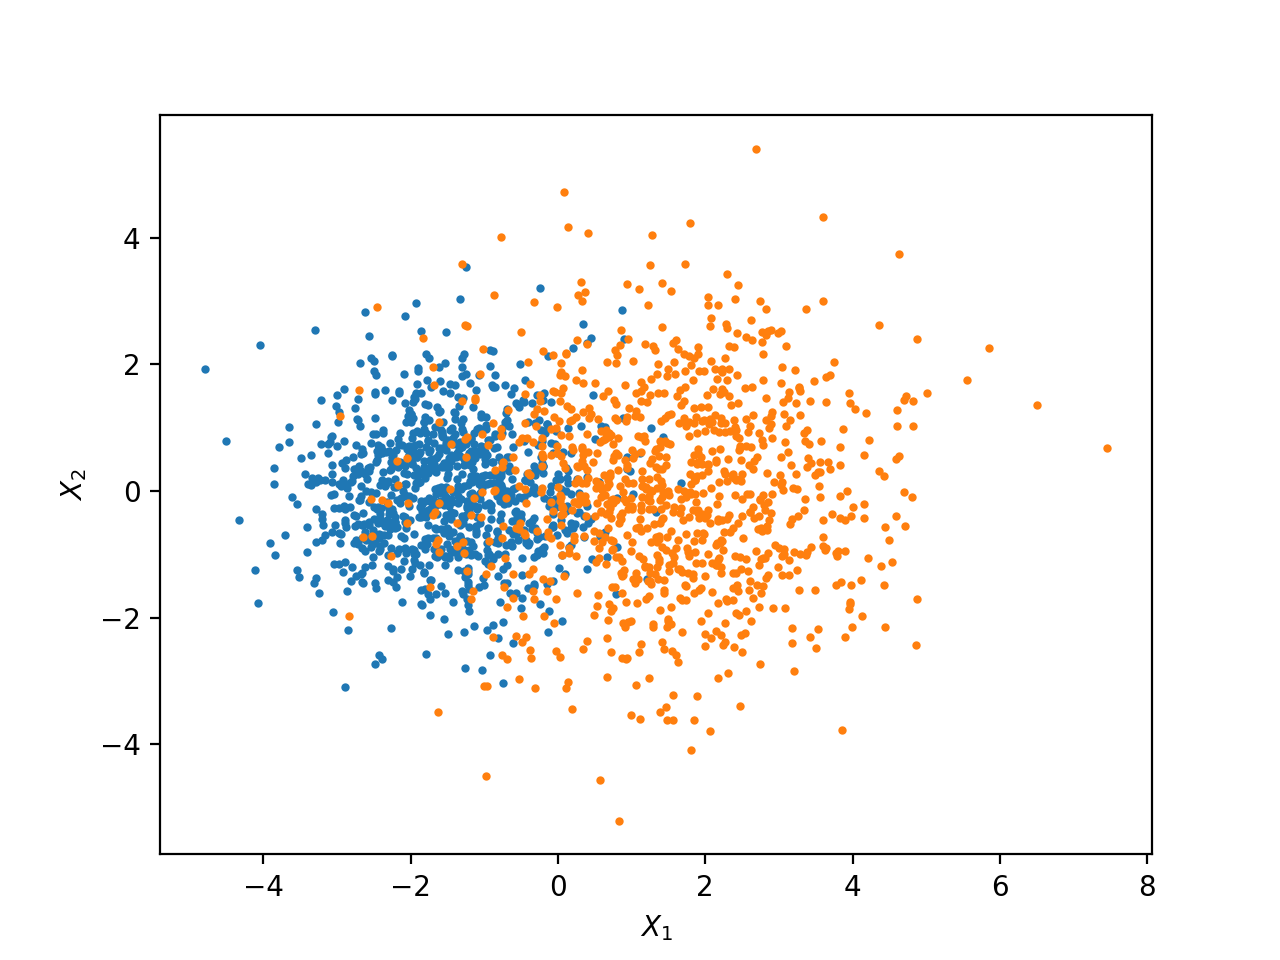

In [34]:
plot_data(x1,y1,x2,y2)

## Logistic Regression

In regression, our outcome variable was continuous. Now our goal is to predict a categorical outcome, such as blue or orange, or 0 or 1, so we're dealing with a classification problem. There are many different classifiers, techniques
that carry out the classification task. But here we'll use one of the most basic ones, called logistic regression.

The name of this technique is a little bit confusing, since it has the word regression as part of the name. But despite this name, it's a binary classifier, meaning that it is applied to classification settings where we have two categories.

Our goal is to model the conditional probability that the outcome belongs to a particular class conditional on the values of the predictors. We can also call these conditional class probabilities. If we have only two classes, we can code the responses, the class labels, using 0s and 1s. So the outcome, y, is always either 0 or 1.

We can write p of x as a shorthand for the probability that y is equal to 1 given the value of x.($p(x)=p(y=1|x)$) So this is a conditional probability. If y is not equal to 1, it must be 0. And this happens with probability 1 minus p of x.
Therefore, this one quantity, p of x, is the only probability that we need to model.

One option might be to use a linear regression model. So we might write the following--$p(x)=\beta_0+\beta_1x_1$, and this is in a setting where we have a single predictor, which is x1.

The most obvious problem here is that the probability must always lie between 0 and 1, but there is nothing here to constrain that. So using this approach, we might get probabilities that are less than 0 or greater than 1, which is not sensible.

Therefore, instead of writing this linear regression for the probability p of x, we will modify the left-hand side
of the equation in the following way---$\log{\frac{p(x)}{1-p(x)}}=\beta_0+\beta_1x_1$.

So this expression here, which is our logistic regression, requires some explanation. Notice that we haven't changed the right-hand side of the equation. So this is still a linear model, but rather than directly modeling the probabilities p of x, it's modeling this expression here on the left-hand side. Because this expression is non-linear, we can say that logistic regression is a linear model that models probabilities on a non-linear scale.

Let's look at the left-hand side now a little bit more carefully. If we use p to denote the probability that some event occurs and then use 1 minus p to denote the probability that this event does not occur, the ratio of these two probabilities, p divided by 1 minus p, is called the odds of that event.

Because odds are defined as ratios of two probabilities, and because probabilities are never negative, the odds of an event can take any value between 0 and plus infinity. Here we take the log of the odds, which gives us the log odds of that particular event. And log odds can vary from minus infinity to plus infinity. So we can now use a linear model to model this expression here. Regarding terminology, the function that maps a probability p to log p over 1 minus p is often called the logit function.

We can naturally extend the logistic regression to multiple predictors. And then it's usually called multiple logistic regression. So we take the expression that we have here from before, and we just simply add multiple predictors here. If we have p predictors, we would have a term beta p times $x_p$. And this here is called multiple logistic regression. The coefficients, the $\beta$s, in this expression must be estimated from data. And this is usually done using the method of maximum likelihood. The intuition behind the maximum likelihood method is to find parameter estimates that make the observed data maximally likely.

### Exercise

In [9]:
def prob_to_odds(p):
    if p <= 0 or p >= 1:
        print("Probabilities must be between 0 and 1.")
    return p / (1-p)

In [11]:
prob_to_odds(0.8)

4.000000000000001

## Logistic Regression in Code

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
clf=LogisticRegression()

In [51]:
X=np.vstack((np.vstack((x1,y1)).T,np.vstack((x2,y2)).T))

In [52]:
X.shape

(2000, 2)

In [53]:
n=1000
y=np.hstack((np.repeat(1,n),np.repeat(2,n)))

In [54]:
y.shape

(2000,)

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.5,random_state=1)

In [56]:
X_train.shape

(1000, 2)

In [57]:
X_test.shape

(1000, 2)

In [58]:
y_train.shape

(1000,)

In [59]:
y_test.shape

(1000,)

In [60]:
clf.fit(X_train,y_train)

LogisticRegression()

In [61]:
clf.score(X_test,y_test)

0.88

In [62]:
clf.predict_proba(np.array([-2,0]).reshape(1,-1))

array([[0.97209795, 0.02790205]])

In [63]:
clf.predict(np.array([-2,0]).reshape(1,-1))

array([1])

## Computing Predictive Probabilities Across the Grid

In [68]:
def plot_probs(ax, clf, class_no):
    xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis=1))
    Z = probs[:,class_no]
    Z = Z.reshape(xx1.shape)
    CS = ax.contourf(xx1, xx2, Z)
    cbar = plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

We just saw how to compute predictive probabilities using sklearn. Let's look at the problem again. We had two predictors, x1 and x2. We put in a test point, which corresponded to some specific values of x1 and x2. And what we computed was predictive probability, or conditional probability, that this particular observation belongs to class 1 or class 2.

In this example, we computed these two probabilities for a single point. What we want to do next is to compute these probabilities at every point of the x1-x2 grid. Let's see how we can do that. I'm just going to talk us through the strategy, and then we'll look at the code.

<IPython.core.display.Javascript object>


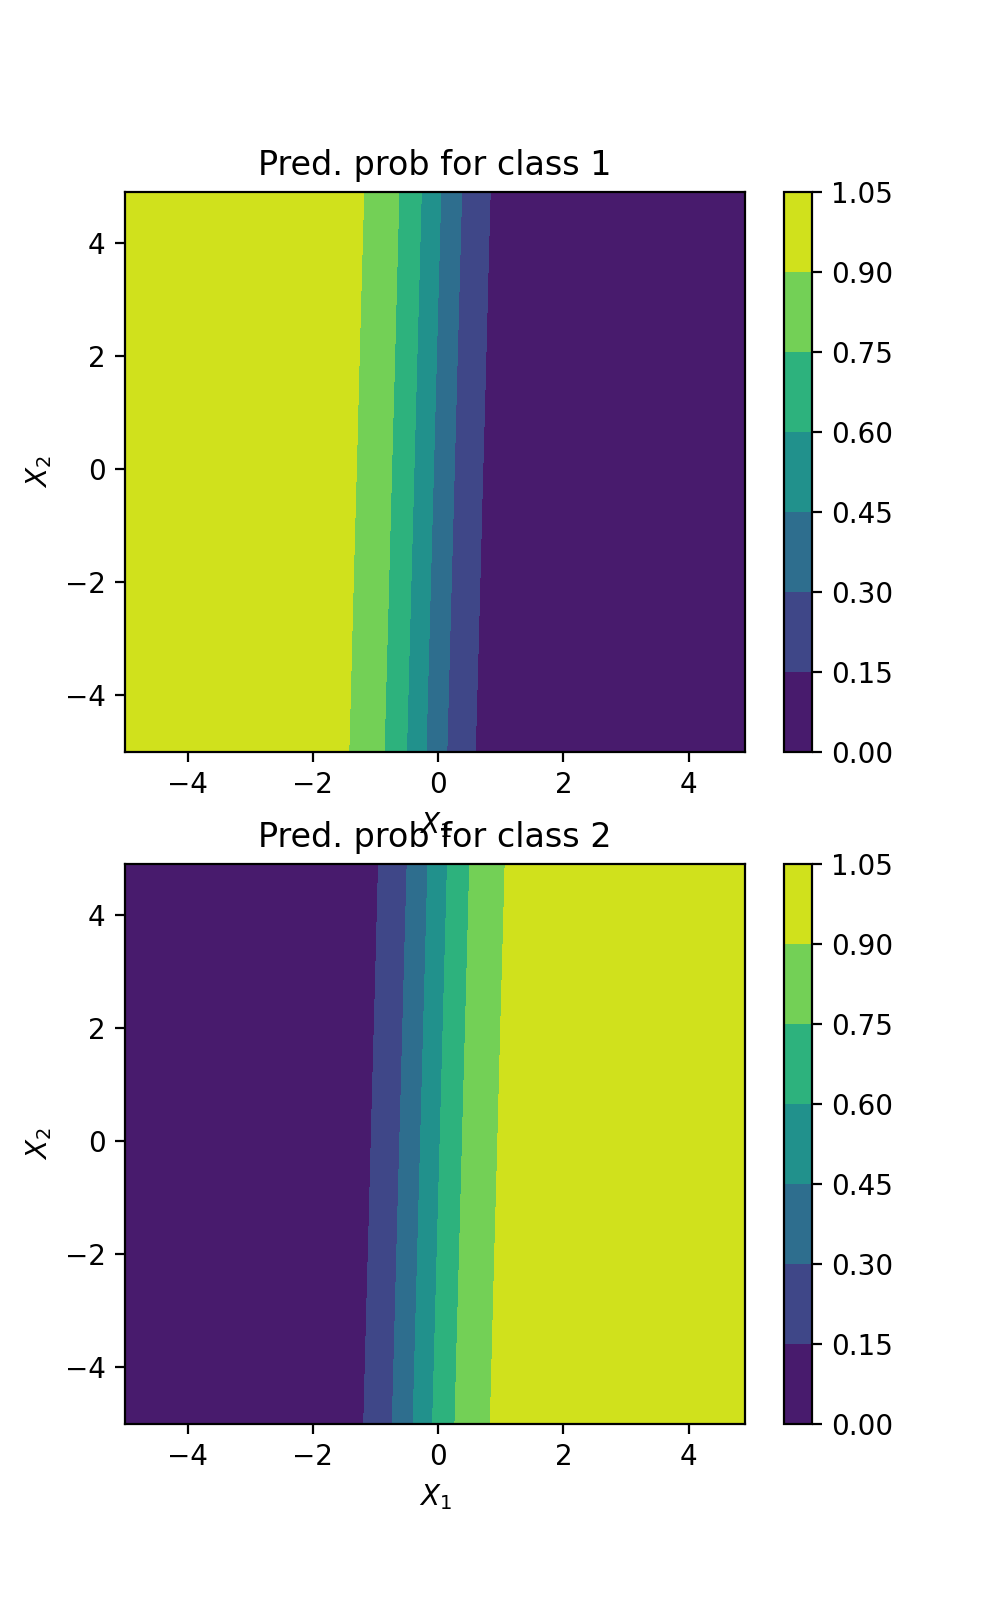

In [69]:
plt.figure(figsize=(5,8))
ax = plt.subplot(211)
plot_probs(ax, clf, 0)
plt.title("Pred. prob for class 1")
ax = plt.subplot(212)
plot_probs(ax, clf, 1)
plt.title("Pred. prob for class 2");